**监督机器学习的核心原理莫过于如下公式：**
$$min\frac{1}{N}\sum_{i=1}^{N}{(L(y_i,f(x_i)))+\lambda J(f)}$$
**最小化经验误差是为了极大程度的拟合训练数据，正则化参数是为了防止过分的拟合训练数据。**

**正则化原理：最小化参数矩阵的每个元素**参数矩阵W中的每个元素都在变小，线性计算的和Z也会变小，激活函数在此时相对呈线性状态，这样就大大简化了深度神经网络的复杂性，**因而可以防止过拟合**。
> 实现参数矩阵的稀疏性,为了特征选择和易于解释
>> L0正则化: L0 范数,矩阵中所有非 0 元素的个数.\
>> L1 范数: 矩阵中各元素绝对值之和,Lasso
>>> ```python
loss = np.sum((y_hat-y)**2)/num_train + lambda*np.sum(abs(w))
```
>>> $$min\frac{1}{N}\sum_{i=1}^{N}{L(y_i,f(x_i))+{\lambda} ||w||_1}$$
>> L2范数: 矩阵中各元素的平方和,Ridge
>>> ```python
loss = ((y_hat-y)**2).sum()/num_train+alpha*(np.square(w)).sum()
```
>>> $$min\frac{1}{N}\sum_{i=1}^{N}{L(y_i,f(x_i))+ \frac {\lambda}{2} ||w||_2}$$

### 获取数据集

In [44]:
import numpy as np 
from sklearn.datasets import load_boston
boston=load_boston()
data,label=boston.data,boston.target
size,rate=data.shape[0],.7 
a=int(size*rate)
x_train,y_train,x_test,y_test=data[:a],label[:a].reshape((-1,1)),data[a:],label[a:].reshape((-1,1))
x_train.shape,y_test.shape

((354, 13), (152, 1))

### 定义L2损失函数和梯度计算并训练

In [60]:
def init_params(dims):
    w, b = np.zeros((dims, 1)), 0
    return w, b

# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    y_hat, num_train = np.dot(X, w)+b, X.shape[0]
    loss = ((y_hat-y)**2).sum()/num_train+alpha/2*(np.square(w)).sum()
#     loss 对 w、b 分别求导
    dw = np.dot(X.T, y_hat-y)/num_train+alpha*w
    db = (y_hat-y).sum()/num_train
    return y_hat, loss, dw, db


def ridge_train(X, y, lr=.01, alpha=.1, epochs=400):
    los = .0
    w, b = init_params(X.shape[1])
    for i in range(epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, alpha)
        w += -lr*dw
        b += -lr*db
        if i % 100 == 0:
            print(f"loss: {loss}")
    return w, b


ridge_train(x_train, y_train)

loss: 698.7869491525424
loss: nan
loss: nan
loss: nan


D:\software\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
D:\software\Python37\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
D:\software\Python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add


(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 nan)

### sklearn中也提供了Ridge的实现方式

In [59]:
from sklearn.linear_model import Ridge
clf=Ridge(alpha=.1)
clf.fit(x_train,y_train)
w=clf.coef_
b=clf.intercept_
y_pred=np.dot(x_test,w.T)+b 
# y_pred
clf.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

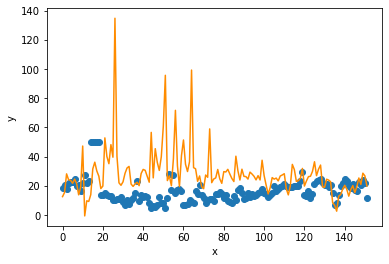

In [57]:
import matplotlib.pyplot as plt 
plt.scatter(range(x_test.shape[0]),y_test)
plt.plot(y_pred,c='darkorange')
plt.ylabel('y')
plt.xlabel('x')
plt.show()